# Get the Cleaned Data Files

In [568]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import os
import geopandas as gpd

In [569]:
#Update the Database with relative paths
current_dir = os.getcwd()
task03_dir = os.path.dirname(current_dir)
database_dir = os.path.join(task03_dir, 'Database')
cleaned_data_dir = os.path.join(database_dir, 'Cleaned Data')

#Get the disaster data file path
Flood_Data_dir = os.path.join(cleaned_data_dir, 'Flood Data','Flood_Data.csv')

#Get the Map Folders Path
Districts_dir = os.path.join(cleaned_data_dir,'Sri Lanka','Districts')
Provinces_dir = os.path.join(cleaned_data_dir,'Sri Lanka','Provinces')
Divisions_dir = os.path.join(cleaned_data_dir,'Sri Lanka','Divisions')

#Get the Climatic Data file path
Climatic_Data_dir = os.path.join(cleaned_data_dir, 'Climatic Data','Climatic_Data.csv')

In [570]:
#Get the cleaned flood data
Flood_Data=pd.read_csv(Flood_Data_dir)

Flood_Data.head()

,Code Province,Code District,Code Division,Duration (d),Deaths,Injured,Missing,Houses Destroyed,Houses Damaged,Victims,...,Losses $USD,Losses $Local,Education centers,Hospitals,Damages in crops Ha.,Lost Cattle,Damages in roads Mts,Season,Temp.Avg.Surface Air (C),Precipitation (mm)
0,lka005,lka005002,lka005002024,0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0.0,0,0,1-1976,24.82,374.16
1,lka007,lka007002,lka007002012,0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0.0,0,0,1-1976,24.82,374.16
2,lka005,lka005001,lka005001018,0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0.0,0,0,1-1976,24.82,374.16
3,lka007,lka007002,lka007002009,0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0.0,0,0,1-1976,24.82,374.16
4,lka007,lka007002,lka007002010,0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0.0,0,0,1-1976,24.82,374.16


In [571]:
#Get the district data
Districts_Geo = gpd.read_file(Districts_dir)

#REmove Code Provi, and Province and Rename the columns Code Distr as Code District
Districts_Geo = Districts_Geo.drop(columns=['Code Provi','Province'])
Districts_Geo = Districts_Geo.rename(columns={'Code Distr':'Code District'})
Districts_Geo

,District,Code District,geometry
0,Kandy,lka002001,"POLYGON ((80.94357 7.48759, 80.94475 7.48733, ..."
1,Matale,lka002002,"POLYGON ((80.75952 8.00522, 80.76125 8.00391, ..."
2,Nuwara Eliya,lka002003,"POLYGON ((80.81107 7.19881, 80.81185 7.19866, ..."
3,Ampara,lka005002,"POLYGON ((81.24207 7.73863, 81.24239 7.73851, ..."
4,Batticaloa,lka005001,"MULTIPOLYGON (((81.79047 7.42767, 81.79041 7.4..."
5,Trincomalee,lka005003,"POLYGON ((80.92495 8.98726, 80.92482 8.98687, ..."
6,Anuradhapura,lka007001,"POLYGON ((80.78942 8.92121, 80.79090 8.92027, ..."
7,Polonnaruwa,lka007002,"POLYGON ((80.93403 8.34535, 80.93440 8.34532, ..."
8,Kurunegala,lka006001,"POLYGON ((80.10358 8.19753, 80.10403 8.19738, ..."
9,Puttalam,lka006002,"MULTIPOLYGON (((79.78232 8.26825, 79.78273 8.2..."


## Analyse the Flood Data

Pre Peocessing Further to Prepare Data For Model

In [572]:
Flood_Data

,Code Province,Code District,Code Division,Duration (d),Deaths,Injured,Missing,Houses Destroyed,Houses Damaged,Victims,...,Losses $USD,Losses $Local,Education centers,Hospitals,Damages in crops Ha.,Lost Cattle,Damages in roads Mts,Season,Temp.Avg.Surface Air (C),Precipitation (mm)
0,lka005,lka005002,lka005002024,0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0.0,0,0,1-1976,24.82,374.16
1,lka007,lka007002,lka007002012,0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0.0,0,0,1-1976,24.82,374.16
2,lka005,lka005001,lka005001018,0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0.0,0,0,1-1976,24.82,374.16
3,lka007,lka007002,lka007002009,0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0.0,0,0,1-1976,24.82,374.16
4,lka007,lka007002,lka007002010,0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0.0,0,0,1-1976,24.82,374.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6674,lka002,lka002003,lka002003003,0,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0.0,0,0,7-2014,28.20,283.90
6675,lka005,lka005003,lka005003018,0,0.0,0.0,0.0,0.0,35,0,...,0,0,0,0,0.0,0,0,7-2014,28.20,283.90
6676,lka003,lka003001,lka003001039,0,0.0,0.0,0.0,1.0,0,0,...,0,0,0,0,0.0,0,0,7-2014,28.20,283.90
6677,lka003,lka003001,lka003001045,0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0.0,0,0,7-2014,28.20,283.90


In [573]:
#sort by season
Flood_Data = Flood_Data.sort_values(by=['Season'])
Flood_Data

,Code Province,Code District,Code Division,Duration (d),Deaths,Injured,Missing,Houses Destroyed,Houses Damaged,Victims,...,Losses $USD,Losses $Local,Education centers,Hospitals,Damages in crops Ha.,Lost Cattle,Damages in roads Mts,Season,Temp.Avg.Surface Air (C),Precipitation (mm)
0,lka005,lka005002,lka005002024,0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0.0,0,0,1-1976,24.82,374.16
1,lka007,lka007002,lka007002012,0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0.0,0,0,1-1976,24.82,374.16
2,lka005,lka005001,lka005001018,0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0.0,0,0,1-1976,24.82,374.16
3,lka007,lka007002,lka007002009,0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0.0,0,0,1-1976,24.82,374.16
4,lka007,lka007002,lka007002010,0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0.0,0,0,1-1976,24.82,374.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6673,lka002,lka002003,lka002003012,0,0.0,0.0,0.0,0.0,12,0,...,0,0,0,0,0.0,0,0,7-2014,28.20,283.90
6674,lka002,lka002003,lka002003003,0,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0.0,0,0,7-2014,28.20,283.90
6675,lka005,lka005003,lka005003018,0,0.0,0.0,0.0,0.0,35,0,...,0,0,0,0,0.0,0,0,7-2014,28.20,283.90
6676,lka003,lka003001,lka003001039,0,0.0,0.0,0.0,1.0,0,0,...,0,0,0,0,0.0,0,0,7-2014,28.20,283.90


In [574]:
#Copy the Flood Data
District_Flood_Data = Flood_Data.copy()

#Drop the Code Province and Code Division Columns
District_Flood_Data.drop(columns=['Code Division','Code Province'], inplace=True)

#Remove Null in Code District
District_Flood_Data = District_Flood_Data[District_Flood_Data['Code District'].notna()]

seasonal_district_flood_data = District_Flood_Data.groupby(['Season', 'Code District']).agg({
    'Temp.Avg.Surface Air (C)': 'mean',
    'Precipitation (mm)': 'mean',
    'Duration (d)': 'max',
    'Deaths': 'sum',
    'Injured': 'sum',
    'Missing': 'sum',
    'Houses Destroyed': 'sum',
    'Houses Damaged': 'sum',
    'Victims': 'sum',
    'Affected': 'sum',
    'Relocated': 'sum',
    'Evacuated': 'sum',
    'Losses $USD': 'sum',
    'Losses $Local': 'sum',
    'Education centers': 'sum',
    'Hospitals': 'sum',
    'Damages in crops Ha.': 'sum',
    'Lost Cattle': 'sum',
    'Damages in roads Mts': 'sum'
})

seasonal_district_flood_data = seasonal_district_flood_data.reset_index()

#Convert the Season to Date Time format
seasonal_district_flood_data['Season'] = pd.to_datetime(seasonal_district_flood_data['Season'])

#Get the Year as a column from the Season
seasonal_district_flood_data['Year'] = seasonal_district_flood_data['Season'].dt.year   

#Take the only the month data from the season
seasonal_district_flood_data['Season'] = seasonal_district_flood_data['Season'].dt.month

#Rename the Season Column to Quarter
seasonal_district_flood_data.rename(columns={'Season':'Quarter'}, inplace=True)

#Change the Quarter Column to int
seasonal_district_flood_data['Quarter'] = seasonal_district_flood_data['Quarter'].astype(int)

seasonal_district_flood_data


C:\Users\Rameez\AppData\Local\Temp\ipykernel_10252\603812339.py:35: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,Quarter,Code District,Temp.Avg.Surface Air (C),Precipitation (mm),Duration (d),Deaths,Injured,Missing,Houses Destroyed,Houses Damaged,...,Relocated,Evacuated,Losses $USD,Losses $Local,Education centers,Hospitals,Damages in crops Ha.,Lost Cattle,Damages in roads Mts,Year
0,1,lka005001,24.82,374.16,0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0.0,0,0,1976
1,1,lka005002,24.82,374.16,0,0.0,0.0,0.0,0.0,2,...,0,0,0,0,0,0,0.0,0,0,1976
2,1,lka007002,24.82,374.16,0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0.0,0,0,1976
3,1,lka003003,24.81,383.73,0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0.0,0,0,1982
4,1,lka004003,24.84,388.92,0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0.0,0,0,1984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,7,lka002001,28.18,286.01,0,0.0,0.0,0.0,0.0,12,...,0,0,0,0,0,0,0.0,0,0,2013
746,7,lka002003,28.20,283.90,0,0.0,0.0,0.0,30.0,145,...,0,0,0,0,0,0,0.0,0,0,2014
747,7,lka003001,28.20,283.90,0,0.0,0.0,0.0,1.0,0,...,0,0,0,0,0,0,0.0,0,0,2014
748,7,lka005003,28.20,283.90,0,0.0,0.0,0.0,0.0,35,...,0,0,0,0,0,0,0.0,0,0,2014


In [575]:
#Get only Year, Quarter, Code Province, Temp.Avg.Surface Air (C), Precipitation (mm), Duration (d), and Affected Columns
seasonal_district_flood_data = seasonal_district_flood_data[['Year','Quarter','Code District','Temp.Avg.Surface Air (C)','Precipitation (mm)','Duration (d)','Affected']]
seasonal_district_flood_data

,Year,Quarter,Code District,Temp.Avg.Surface Air (C),Precipitation (mm),Duration (d),Affected
0,1976,1,lka005001,24.82,374.16,0,0
1,1976,1,lka005002,24.82,374.16,0,1750
2,1976,1,lka007002,24.82,374.16,0,0
3,1982,1,lka003003,24.81,383.73,0,6000
4,1984,1,lka004003,24.84,388.92,0,0
...,...,...,...,...,...,...,...
745,2013,7,lka002001,28.18,286.01,0,46
746,2014,7,lka002003,28.20,283.90,0,560
747,2014,7,lka003001,28.20,283.90,0,1304
748,2014,7,lka005003,28.20,283.90,0,0


In [576]:
#Sort the DataFrame by 'Code District', 'Year', and 'Quarter'
seasonal_district_flood_data.sort_values(by=['Code District', 'Year', 'Quarter'], inplace=True)

#Create a MultiIndex with all combinations of 'Year', 'Quarter', and 'Code District'
all_combinations = pd.MultiIndex.from_product([range(1976, 2015), [1, 2, 3, 4], seasonal_district_flood_data['Code District'].unique()], names=['Year', 'Quarter', 'Code District'])

#Reindex the DataFrame with the new MultiIndex to fill in missing combinations
seasonal_district_flood_data = seasonal_district_flood_data.set_index(['Year', 'Quarter', 'Code District']).reindex(all_combinations)

#Sort the DataFrame again to get the original order
seasonal_district_flood_data.sort_values(by=['Code District', 'Year', 'Quarter'], inplace=True)

#Fill missing values using the previous row's values
seasonal_district_flood_data.fillna(method='ffill', inplace=True)

#Reset the index to make it a regular DataFrame again
seasonal_district_flood_data.reset_index(inplace=True)

seasonal_district_flood_data

C:\Users\Rameez\AppData\Local\Temp\ipykernel_10252\260470959.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Quarter,Code District,Temp.Avg.Surface Air (C),Precipitation (mm),Duration (d),Affected
0,1976,1,lka001001,NaN,NaN,NaN,NaN
1,1976,2,lka001001,NaN,NaN,NaN,NaN
2,1976,3,lka001001,NaN,NaN,NaN,NaN
3,1976,4,lka001001,NaN,NaN,NaN,NaN
4,1977,1,lka001001,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3895,2013,4,lka009002,27.90,321.24,11.0,6267.0
3896,2014,1,lka009002,27.90,321.24,11.0,6267.0
3897,2014,2,lka009002,27.90,321.24,11.0,6267.0
3898,2014,3,lka009002,27.90,321.24,11.0,6267.0


In [577]:
#Get All Nan Values
seasonal_district_flood_data[seasonal_district_flood_data.isna().any(axis=1)]

,Year,Quarter,Code District,Temp.Avg.Surface Air (C),Precipitation (mm),Duration (d),Affected
0,1976,1,lka001001,NaN,NaN,NaN,NaN
1,1976,2,lka001001,NaN,NaN,NaN,NaN
2,1976,3,lka001001,NaN,NaN,NaN,NaN
3,1976,4,lka001001,NaN,NaN,NaN,NaN
4,1977,1,lka001001,NaN,NaN,NaN,NaN
5,1977,2,lka001001,NaN,NaN,NaN,NaN
6,1977,3,lka001001,NaN,NaN,NaN,NaN
7,1977,4,lka001001,NaN,NaN,NaN,NaN
8,1978,1,lka001001,NaN,NaN,NaN,NaN
9,1978,2,lka001001,NaN,NaN,NaN,NaN


In [578]:
#Delete the Year 1976 to 1985
seasonal_district_flood_data = seasonal_district_flood_data[seasonal_district_flood_data['Year'] > 1985]

#Get Year as int
seasonal_district_flood_data['Year'] = seasonal_district_flood_data['Year'].astype(int)

#Reset the Index
seasonal_district_flood_data.reset_index(inplace=True)

#Drop the index column
seasonal_district_flood_data.drop(columns=['index'], inplace=True)

seasonal_district_flood_data

C:\Users\Rameez\AppData\Local\Temp\ipykernel_10252\4226025029.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Rameez\AppData\Local\Temp\ipykernel_10252\4226025029.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Quarter,Code District,Temp.Avg.Surface Air (C),Precipitation (mm),Duration (d),Affected
0,1986,1,lka001001,27.54,341.27,0.0,0.0
1,1986,2,lka001001,27.54,341.27,0.0,0.0
2,1986,3,lka001001,27.54,341.27,0.0,0.0
3,1986,4,lka001001,27.54,341.27,0.0,0.0
4,1987,1,lka001001,27.54,341.27,0.0,0.0
...,...,...,...,...,...,...,...
2895,2013,4,lka009002,27.90,321.24,11.0,6267.0
2896,2014,1,lka009002,27.90,321.24,11.0,6267.0
2897,2014,2,lka009002,27.90,321.24,11.0,6267.0
2898,2014,3,lka009002,27.90,321.24,11.0,6267.0


In [579]:
#Convert the Year as a string
seasonal_district_flood_data['Year'] = seasonal_district_flood_data['Year'].astype(str)

#Combine the Year and Quarter as a string
seasonal_district_flood_data['Year'] = seasonal_district_flood_data['Year'] + '-' + seasonal_district_flood_data['Quarter'].astype(str)

#Convert the Year as a Date Time YYYY-MM
seasonal_district_flood_data['Year'] = pd.to_datetime(seasonal_district_flood_data['Year'])

seasonal_district_flood_data

C:\Users\Rameez\AppData\Local\Temp\ipykernel_10252\1655746108.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Rameez\AppData\Local\Temp\ipykernel_10252\1655746108.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Rameez\AppData\Local\Temp\ipykernel_10252\1655746108.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,Year,Quarter,Code District,Temp.Avg.Surface Air (C),Precipitation (mm),Duration (d),Affected
0,1986-01-01,1,lka001001,27.54,341.27,0.0,0.0
1,1986-02-01,2,lka001001,27.54,341.27,0.0,0.0
2,1986-03-01,3,lka001001,27.54,341.27,0.0,0.0
3,1986-04-01,4,lka001001,27.54,341.27,0.0,0.0
4,1987-01-01,1,lka001001,27.54,341.27,0.0,0.0
...,...,...,...,...,...,...,...
2895,2013-04-01,4,lka009002,27.90,321.24,11.0,6267.0
2896,2014-01-01,1,lka009002,27.90,321.24,11.0,6267.0
2897,2014-02-01,2,lka009002,27.90,321.24,11.0,6267.0
2898,2014-03-01,3,lka009002,27.90,321.24,11.0,6267.0


In [580]:
#Get Dummy Variables for the Quarter
seasonal_district_flood_data = pd.get_dummies(seasonal_district_flood_data, columns=['Quarter'])

#Replace True with 1 and False with 0
seasonal_district_flood_data = seasonal_district_flood_data.replace(True,1)
seasonal_district_flood_data = seasonal_district_flood_data.replace(False,0)

seasonal_district_flood_data

,Year,Code District,Temp.Avg.Surface Air (C),Precipitation (mm),Duration (d),Affected,Quarter_1,Quarter_2,Quarter_3,Quarter_4
0,1986-01-01,lka001001,27.54,341.27,0.0,0.0,1,0,0,0
1,1986-02-01,lka001001,27.54,341.27,0.0,0.0,0,1,0,0
2,1986-03-01,lka001001,27.54,341.27,0.0,0.0,0,0,1,0
3,1986-04-01,lka001001,27.54,341.27,0.0,0.0,0,0,0,1
4,1987-01-01,lka001001,27.54,341.27,0.0,0.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2895,2013-04-01,lka009002,27.90,321.24,11.0,6267.0,0,0,0,1
2896,2014-01-01,lka009002,27.90,321.24,11.0,6267.0,1,0,0,0
2897,2014-02-01,lka009002,27.90,321.24,11.0,6267.0,0,1,0,0
2898,2014-03-01,lka009002,27.90,321.24,11.0,6267.0,0,0,1,0


## Data Modeling

Using XGBoost Regression

In [581]:
#Empty list to store the results
results = []

#Convert 'Year' to datetime
seasonal_district_flood_data['Year'] = pd.to_datetime(seasonal_district_flood_data['Year'])

#Specify features and target variable
features = ['Temp.Avg.Surface Air (C)', 'Precipitation (mm)', 'Duration (d)', 'Quarter_1', 'Quarter_2', 'Quarter_3', 'Quarter_4']
target = 'Affected'

#Iterate over each unique 'Code District'
for code_district in seasonal_district_flood_data['Code District'].unique():
    #Split the data into training and testing sets based on the specified date
    train_data = seasonal_district_flood_data[(seasonal_district_flood_data['Code District'] == code_district) & (seasonal_district_flood_data['Year'] <= '2011-12-01')]
    test_data = seasonal_district_flood_data[(seasonal_district_flood_data['Code District'] == code_district) & (seasonal_district_flood_data['Year'] > '2011-12-01')]

    #Separate features and target variable for training and testing sets
    X_train = train_data[features]
    y_train = train_data[target]
    X_test = test_data[features]
    y_test = test_data[target]

    #Train the XGBoost Regression model
    model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    model.fit(X_train, y_train)

    #Make predictions on the test set
    predictions = model.predict(X_test)

    #Evaluate the model using Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, predictions)
    print(f"Code District: {code_district}, Mean Squared Error: {mse}")

    #Append the results to the list
    results.append([code_district, mse])


Code District: lka001001, Mean Squared Error: 112815278.00149667
Code District: lka001002, Mean Squared Error: 632047969.20823
Code District: lka001003, Mean Squared Error: 370408796.6563234
Code District: lka002001, Mean Squared Error: 19003.693571980042
Code District: lka002002, Mean Squared Error: 100.13766254871825
Code District: lka002003, Mean Squared Error: 44135.89245355915
Code District: lka003001, Mean Squared Error: 10281261.88867258
Code District: lka003002, Mean Squared Error: 43163309.51186037
Code District: lka003003, Mean Squared Error: 5.444150503305188
Code District: lka004001, Mean Squared Error: 200669.81015576
Code District: lka004002, Mean Squared Error: 0.00038535386556759477
Code District: lka004003, Mean Squared Error: 5.616334419755731e-08
Code District: lka004004, Mean Squared Error: 0.0
Code District: lka004005, Mean Squared Error: 0.6042633056640625
Code District: lka005001, Mean Squared Error: 23732514140.30531
Code District: lka005002, Mean Squared Error:

In [582]:
#Get the Districts Where the MSE is less than 10 from the results
districts = [result[0] for result in results if result[1] < 10]

districts

['lka003003',
 'lka004002',
 'lka004003',
 'lka004004',
 'lka004005',
 'lka005003',
 'lka008002']

In [583]:
#Get in to a Data Frame
accurate_districts = pd.DataFrame(districts, columns=['Code District'])
accurate_districts

,Code District
0,lka003003
1,lka004002
2,lka004003
3,lka004004
4,lka004005
5,lka005003
6,lka008002


In [584]:
#Merge the accurate_districts DataFrame with the Districts_Geo GeoDataFrame
accurate_districts_geo = Districts_Geo.merge(accurate_districts, on='Code District')
accurate_districts_geo

,District,Code District,geometry
0,Trincomalee,lka005003,"POLYGON ((80.92495 8.98726, 80.92482 8.98687, ..."
1,Kilinochchi,lka004005,"MULTIPOLYGON (((79.98473 9.30669, 79.98482 9.3..."
2,Mannar,lka004002,"MULTIPOLYGON (((79.73038 9.10788, 79.73080 9.1..."
3,Mullaitivu,lka004004,"POLYGON ((80.62878 9.45522, 80.62958 9.45456, ..."
4,Vavuniya,lka004003,"POLYGON ((80.60546 9.12634, 80.60677 9.12592, ..."
5,Hambantota,lka003003,"POLYGON ((81.62659 6.56042, 81.62744 6.55981, ..."
6,Moneragala,lka008002,"POLYGON ((81.46375 7.45724, 81.46465 7.45715, ..."


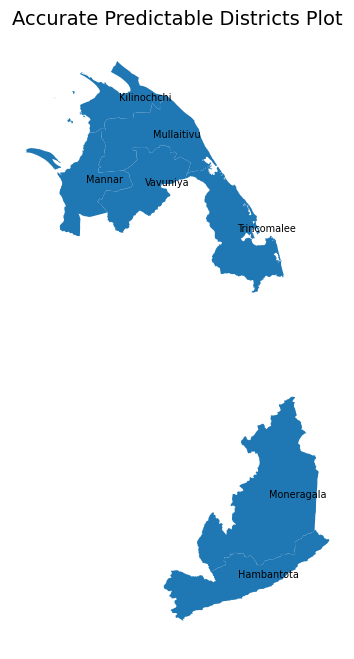

In [585]:
#Set the figure size
fig, ax = plt.subplots(figsize=(12, 8))

#Plot the districts
accurate_districts_geo.plot(ax=ax)

#Add legend with district labels
for idx, row in accurate_districts_geo.iterrows():
    ax.annotate(row['District'], (row.geometry.centroid.x, row.geometry.centroid.y), color='black', fontsize=7)

#Set plot title and axis labels
ax.set_title('Accurate Predictable Districts Plot', fontsize=14)

#Remove the axis ticks
ax.set_xticks([])
ax.set_yticks([])

#Remove the border around the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#Show the plot
plt.show()